In [1]:
!pip install pyshp shapely matplotlib


In [2]:
import shapefile
import matplotlib.pyplot as plt
from shapely.geometry import shape


In [3]:
# Define the path to the shapefile components
shapefile_path = "eez_iho.shp"
shapefile_shx_path = "eez_iho.shx"
shapefile_dbf_path = "eez_iho.dbf"


In [4]:
# Read the shapefile using the pyshp library
sf = shapefile.Reader(shapefile_path)


In [5]:
# Extract relevant geometries for the German EEZ in the North Sea
german_eez_geometries = []
for sr in sf.shapeRecords():
    record = sr.record.as_dict()
    if record['eez'] == 'German Exclusive Economic Zone' and record['territory1'] == 'Germany':
        geom = shape(sr.shape.__geo_interface__)
        german_eez_geometries.append(geom)


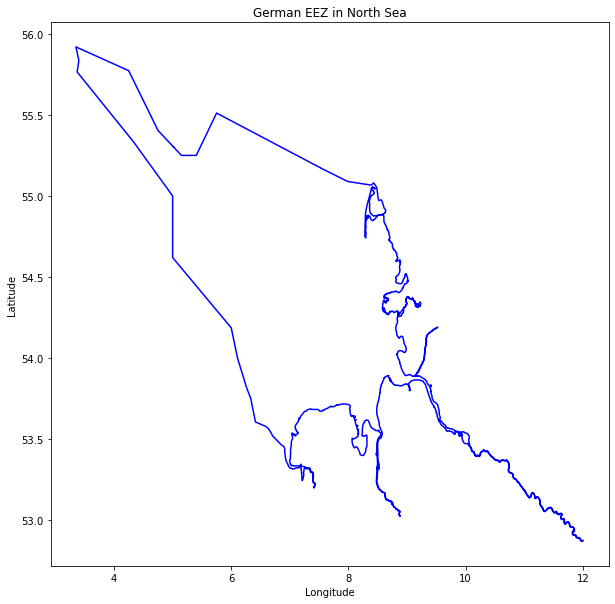

In [12]:
# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each German EEZ geometry
for geom in german_eez_geometries:
    if geom.geom_type == 'Polygon':
        x, y = geom.exterior.xy
        ax.plot(x, y, color='blue')
    elif geom.geom_type == 'MultiPolygon':
        for part in geom:
            x, y = part.exterior.xy
            ax.plot(x, y, color='blue')

ax.set_title("German EEZ in North Sea")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.savefig("german_eez_north_sea.png", dpi=300)
plt.show()